# Introduction

Our input is the selected model with best paramaters <br/>


# Notebooks & dashboard

There are 5 different notebooks:
* __P7_EDA__: focusing on Exploratory Data Analysis,
* __P7_FE__: focusing on Feature engineering and a first model-agnostic Feature Selection,
* __P7_FS__: focusing on Feature Selecion,
* __P7_Model__ : focusing on scoring with model evaluation,
* __Current: P7_Interpretation__ : focusing on model interpretation, <br/>
And a dashboard python file.

# Forewords
In this Notebook, we rank assess preprocessing, rank classifiers and determine best model & parameters through Hyperopt.

In [9]:
import pandas as pd
import pickle

In [10]:
import matplotlib.pyplot as plt

In [11]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [12]:
import shap

In [13]:
from sklearn.pipeline import make_pipeline

In [14]:
filename = 'Data/model.sav'
model = pickle.load(open(filename, 'rb'))

In [15]:
pipe = make_pipeline(model)

In [16]:
# load target
with open("Data/final.pkl", mode="rb") as df:
    final = pickle.load(df)
print('New applications full shape: ', final.shape)

New applications full shape:  (48744, 128)


In [19]:
final

RISK_FLAG  RISK_PROBA  N_CREDIT_TERM  YEARS_BIRTH  \
SK_ID_CURR                                                      
100001              1    0.501727       0.036147    52.715068   
100005              1    0.710362       0.077973    49.490411   
100013              0    0.221559       0.105202    54.898630   
100028              0    0.209704       0.031123    38.290411   
100038              1    0.650590       0.051266    35.726027   
...               ...         ...            ...          ...   
456221              0    0.418804       0.042354    54.712329   
456222              1    0.592035       0.051267    30.646575   
456223              0    0.081372       0.105414    43.621918   
456224              0    0.294809       0.055840    38.268493   
456250              1    0.630356       0.079003    38.252055   

            DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  AMT_CREDIT  DAYS_EMPLOYED  \
SK_ID_CURR                                                                   
100001                     -1740.0      20560.5    568800.0        -2329.0   
100005                         0.0      17370.0    222768.0        -4469.0   
100013                      -856.0      69777.0    663264.0        -4458.0   
100028                     -1805.0      49018.5   1575000.0        -1866.0   
100038                      -821.0      32067.0    625500.0        -2191.0   
...                            ...          ...         ...            ...   
456221                      -684.0      17473.5    412560.0        -5169.0   
456222                         0.0      31909.5    622413.0        -1149.0   
456223                      -838.0      33205.5    315000.0        -3037.0   
456224                     -2308.0      25128.0    450000.0        -2731.0   
456250                      -327.0      24709.5    312768.0         -633.0   

            AMT_GOODS_PRICE  DAYS_ID_PUBLISH  ...  \
SK_ID_CURR                                    ...   
100001             450000.0           -812.0  ...   
100005             180000.0          -1623.0  ...   
100013             630000.0          -3503.0  ...   
100028            1575000.0          -4208.0  ...   
100038             625500.0          -4262.0  ...   
...                     ...              ...  ...   
456221             270000.0          -3399.0  ...   
456222             495000.0          -3003.0  ...   
456223             315000.0          -1504.0  ...   
456224             450000.0          -1364.0  ...   
456250             270000.0          -4220.0  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
100001                        -1329.000000            23787.000   
100005                         -128.000000            40153.500   
100013                        -1707.000000            24232.500   
100028                        -1862.000000            49315.500   
100038                        -1347.127457            92605.500   
...                                    ...                  ...   
456221                         -604.000000           254700.000   
456222                        -1347.127457            26788.500   
456223                         -701.000000           111295.665   
456224                        -2497.000000            40468.500   
456250                         -272.000000            66091.500   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
100001                          -0.042218   
100005                          -0.100050   
100013                           0.052363   
100028                          -0.032521   
100038                           0.131358   
...                                   ...   
456221                           0.132000   
456222                           0.096814   
456223                          -0.050012   
456224                           0.102514   
456250                           0.058742   

   

In [21]:
y_pred = pipe.predict(final.drop(columns=['RISK_FLAG', 'RISK_PROBA']))

In [22]:
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [25]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
# control failure rate of y_pred
print('global failure rate: ',
     round(100 * pred_fail / (pred_good + pred_fail), 2))

global failure rate:  27.69


In [26]:
y_proba = pipe.predict_proba(final.drop(columns=['RISK_FLAG', 'RISK_PROBA']))

In [27]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [30]:
# labels for best threshold
y_pred = to_labels(y_proba, 0.5)[:, 1]

In [31]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
print('failure rate on entire test set: ', pred_fail / (pred_good + pred_fail))

failure rate on entire test set:  0.2769161332676842


In [32]:
failure_rate = pred_fail / (pred_good + pred_fail)

In [33]:
failure_rate

0.2769161332676842

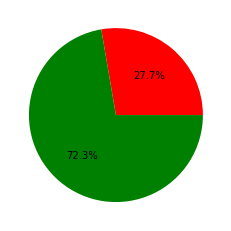

In [34]:
plt.pie([failure_rate, 1 - failure_rate], colors=['r', 'g'],  autopct='%1.1f%%')
plt.show()

In [15]:
# for remote app build (github < 100 Mb)
# create a sample and test threshold relevance 
tiny = test.sample(n=1000, random_state=42)

In [16]:
tiny

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
208550                1          450000.0    854896.5      36351.0   
173779                0           67500.0    296280.0      19062.0   
365820                0          135000.0    339948.0      35694.0   
144092                1          256500.0    609898.5      31270.5   
291599                1          180000.0    450000.0      22977.0   
...                 ...               ...         ...          ...   
385142                0          382500.0    459000.0      20349.0   
150289                0          225000.0   1928304.0      79708.5   
129141                0          202500.0    291384.0      28948.5   
180323                0          166500.0    654048.0      24786.0   
233509                1          103500.0    337500.0      24687.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
208550             702000.0                    0.032561        -1149.0   
173779             225000.0                    0.009175            0.0   
365820             315000.0                    0.024610        -4891.0   
144092             526500.0                    0.002042        -2773.0   
291599             450000.0                    0.018029        -5816.0   
...                     ...                         ...            ...   
385142             459000.0                    0.018634            0.0   
150289            1800000.0                    0.035792         -238.0   
129141             270000.0                    0.019101        -1544.0   
180323             540000.0                    0.046220            0.0   
233509             337500.0                    0.031329        -1029.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
208550                -5443.0            -3953               1  ...   
173779                 -192.0            -3237               0  ...   
365820                -9273.0            -4450               1  ...   
144092                -2075.0            -4943               1  ...   
291599                -1188.0            -5943               1  ...   
...                       ...              ...             ...  ...   
385142                -4446.0            -1626               0  ...   
150289               -11642.0              -39               1  ...   
129141                -2679.0            -4188               1  ...   
180323               -14613.0            -4715               0  ...   
233509                 -356.0            -1994               1  ...   

            CC_CNT_DRAWINGS_ATM_CURRENT_MEAN  CC_CNT_DRAWINGS_ATM_CURRENT_VAR  \
SK_ID_CURR                                                                      
208550                              0.000000                         0.000000   
173779                              0.000000                         0.000000   
365820                              0.000000                         0.000000   
144092                              0.416667                         1.356061   
291599                              0.000000                         0.000000   
...                                      ...                              ...   
385142                              0.000000                         0.000000   
150289                              0.015625                         0.015625   
129141                              0.000000                         0.000000   
180323                              0.000000                         0.000000   
233509                              0.000000                         0.000000   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
208550        

In [17]:
tiny_proba = pipe.predict_proba(tiny)

In [18]:
# labels for best threshold
tiny_pred = to_labels(tiny_proba, 0.1)[:, 1]

In [19]:
# check if failure is realistic applied on test set
pred_good = (tiny_pred == 0).sum()
pred_fail = (tiny_pred == 1).sum()
print('failure rate on tiny sample: ', pred_fail / (pred_good + pred_fail))

failure rate on tiny sample:  0.232


In [20]:
tiny.index.tolist()

[208550,
 173779,
 365820,
 144092,
 291599,
 418609,
 398791,
 202661,
 185171,
 111761,
 258225,
 174954,
 297336,
 369893,
 195695,
 384221,
 203868,
 182895,
 342449,
 352450,
 156268,
 282585,
 362814,
 371973,
 431241,
 160504,
 144334,
 225460,
 296432,
 259424,
 360960,
 154681,
 314211,
 163669,
 248579,
 449302,
 185231,
 194468,
 113490,
 139058,
 325306,
 199058,
 155077,
 127975,
 360439,
 435267,
 156228,
 172060,
 238413,
 301697,
 283216,
 375041,
 224158,
 407681,
 256114,
 180037,
 151412,
 383990,
 101099,
 224339,
 407218,
 301169,
 362707,
 211866,
 437005,
 126965,
 232738,
 367663,
 253940,
 128130,
 217064,
 347678,
 205866,
 166049,
 112720,
 405444,
 436394,
 177944,
 123575,
 120953,
 451934,
 235677,
 153706,
 127318,
 381747,
 452418,
 185646,
 391487,
 378330,
 423710,
 455439,
 271606,
 340855,
 211694,
 366664,
 293316,
 424639,
 285117,
 313943,
 428859,
 280693,
 278812,
 386302,
 344561,
 330075,
 363232,
 148031,
 343072,
 403945,
 330616,
 275967,
 

In [21]:
# save the tiny application set
filename = 'Streamlit_App/tiny.pkl'
pickle.dump(tiny, open(filename, 'wb'))

In [22]:
test['RISK_FLAG'] = y_pred

In [23]:
test['RISK_PROBA'] = y_proba[:, 1]

In [24]:
test.head(3)

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
100001                0          135000.0    568800.0      20560.5   
100005                1           99000.0    222768.0      17370.0   
100013                1          202500.0    663264.0      69777.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
100001             450000.0                    0.018850        -2329.0   
100005             180000.0                    0.035792        -4469.0   
100013             630000.0                    0.019101        -4458.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
100001                -5170.0             -812               1  ...   
100005                -9118.0            -1623               1  ...   
100013                -2175.0            -3503               1  ...   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
100001                              0.0                      0.000000   
100005                              0.0                      0.000000   
100013                              7.0                      0.239583   

            CC_CNT_DRAWINGS_CURRENT_SUM  CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                                             
100001                              0.0                     0.000000   
100005                              0.0                     0.000000   
100013                             23.0                     1.320943   

            CC_CNT_DRAWINGS_POS_CURRENT_MEAN  CC_CNT_DRAWINGS_POS_CURRENT_VAR  \
SK_ID_CURR                                                                      
100001                                   0.0                              0.0   
100005                                   0.0                              0.0   
100013                                   0.0                              0.0   

            N_CC_USE_LATE_MONTH_6  N_CC_USE_LATE_MONTH_2  RISK_FLAG  \
SK_ID_CURR                                                            
100001                        0.0                    0.0          1   
100005                        0.0                    0.0          1   
100013                        0.0                    0.0          0   

            RISK_PROBA  
SK_ID_CURR              
100001        0.113026  
100005        0.181314  
100013        0.028870  

[3 rows x 273 columns]

In [25]:
test[test['RISK_FLAG'] == 1].shape

(11784, 273)

In [26]:
test[test['RISK_FLAG'] == 1].sample(15)

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
166891                0           72000.0    360000.0      18508.5   
273864                1          225000.0   1096020.0      52857.0   
100591                1          180000.0    328405.5      26077.5   
284511                0          135000.0    431280.0      23526.0   
106428                1          270000.0    360000.0      23004.0   
432932                0          112500.0    311877.0      16051.5   
126651                0          148500.0    331920.0      17077.5   
196777                1          157500.0    157500.0      12573.0   
424672                0          153000.0    260725.5      20727.0   
156492                0          270000.0    630000.0      32166.0   
428757                0           40500.0    270000.0      13914.0   
104776                1          157500.0    319041.0      23215.5   
450081                1          135000.0    295452.0      35064.0   
101198                1          135000.0    405000.0      37273.5   
136617                1          135000.0    675000.0      36747.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
166891             360000.0                    0.026392         -568.0   
273864             900000.0                    0.006629         -635.0   
100591             283500.0                    0.018850         -243.0   
284511             360000.0                    0.030755         -758.0   
106428             360000.0                    0.018634         -329.0   
432932             252000.0                    0.022625            0.0   
126651             225000.0                    0.019689         -997.0   
196777             157500.0                    0.008230         -176.0   
424672             198000.0                    0.011657        -1485.0   
156492             630000.0                    0.031329        -6030.0   
428757             270000.0                    0.015221            0.0   
104776             270000.0                    0.010006         -802.0   
450081             261000.0                    0.024610        -1589.0   
101198             405000.0                    0.032561        -1644.0   
136617             675000.0                    0.028663         -919.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
166891                -1285.0            -4763               1  ...   
273864                -1368.0             -814               1  ...   
100591                -2132.0             -186               1  ...   
284511                 -912.0            -4564               1  ...   
106428                -1876.0            -3112               1  ...   
432932                 -404.0            -2488               0  ...   
126651               -10782.0             -247               1  ...   
196777                -3304.0             -415               1  ...   
424672                -8148.0            -2586               1  ...   
156492                -4170.0            -1687               1  ...   
428757               -13340.0            -3728               0  ...   
104776                -7018.0            -1805               1  ...   
450081                -4445.0            -2755               1  ...   
101198                -6187.0            -4278               1  ...   
136617                -6779.0            -4543               1  ...   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
166891                              0.0                      0.000000   
273864                              0.0                      0.000000   
100591                              8.0                      1

In [35]:
inputs = final.drop(columns=['RISK_FLAG', 'RISK_PROBA'])

In [36]:
inputs.loc[[102068]]

N_CREDIT_TERM  YEARS_BIRTH  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
SK_ID_CURR                                                                    
102068           0.067497    40.879452                 -2154.0      13198.5   

            AMT_CREDIT  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                
102068        195543.0        -1754.0         148500.0          -4965.0   

            N_ANNUITY_INCOME_RATIO  BUR_DAYS_CREDIT_MEAN  ...  \
SK_ID_CURR                                                ...   
102068                    0.073325           -623.142857  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
102068                             -1071.0              21159.0   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
102068                           0.029665   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
102068                                        -29876.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
102068                           3.55                          6912.0   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
102068                                   1.559032                  -566.0   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
102068                      900000.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
102068                                            0.381944  

[1 rows x 126 columns]

In [37]:
inputs.index.get_loc(102068)

299

In [38]:
inputs.iloc[[299]]

N_CREDIT_TERM  YEARS_BIRTH  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
SK_ID_CURR                                                                    
102068           0.067497    40.879452                 -2154.0      13198.5   

            AMT_CREDIT  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                
102068        195543.0        -1754.0         148500.0          -4965.0   

            N_ANNUITY_INCOME_RATIO  BUR_DAYS_CREDIT_MEAN  ...  \
SK_ID_CURR                                                ...   
102068                    0.073325           -623.142857  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
102068                             -1071.0              21159.0   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
102068                           0.029665   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
102068                                        -29876.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
102068                           3.55                          6912.0   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
102068                                   1.559032                  -566.0   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
102068                      900000.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
102068                                            0.381944  

[1 rows x 126 columns]

In [39]:
idx = inputs.loc[[102068]].index.to_numpy()

In [40]:
inputs.head(3)

N_CREDIT_TERM  YEARS_BIRTH  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
SK_ID_CURR                                                                    
100001           0.036147    52.715068                 -1740.0      20560.5   
100005           0.077973    49.490411                     0.0      17370.0   
100013           0.105202    54.898630                  -856.0      69777.0   

            AMT_CREDIT  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                
100001        568800.0        -2329.0         450000.0           -812.0   
100005        222768.0        -4469.0         180000.0          -1623.0   
100013        663264.0        -4458.0         630000.0          -3503.0   

            N_ANNUITY_INCOME_RATIO  BUR_DAYS_CREDIT_MEAN  ...  \
SK_ID_CURR                                                ...   
100001                    0.152300           -735.000000  ...   
100005                    0.175455           -190.666667  ...   
100013                    0.344578          -1737.500000  ...   

            CLOSED_DAYS_CREDIT_ENDDATE_MIN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                        
100001                             -1329.0              23787.0   
100005                              -128.0              40153.5   
100013                             -1707.0              24232.5   

            PREV_N_ADJ_INTEREST_EVAL_MEAN  \
SK_ID_CURR                                  
100001                          -0.042218   
100005                          -0.100050   
100013                           0.052363   

            INSAGG_INS_N_PREV_LAST_DAYS_INSTALMENT_SUM  \
SK_ID_CURR                                               
100001                                        -15044.0   
100005                                         -4194.0   
100013                                        -26017.0   

            APPROVED_NC_LOAN_AGE_MEAN  BUR_AMT_CREDIT_MAX_OVERDUE_MAX  \
SK_ID_CURR                                                              
100001                       4.750000                     9012.323354   
100005                       2.000000                        0.000000   
100013                       2.833333                    19305.000000   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM  ACTIVE_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                                  
100001                                   1.977617             -559.000000   
100005                                   1.803738             -137.000000   
100013                                 406.259677             -940.042198   

            PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                             
100001                       24835.5   
100005                       44617.5   
100013                      450000.0   

            INSAGG_INS_N_PREV_EARLINESS_OVERDUE_RATIO_MEAN  
SK_ID_CURR                                                  
100001                                            0.107143  
100005                                            0.000000  
100013                                            0.162935  

[3 rows x 126 columns]

In [41]:
pipe.predict_proba(inputs.loc[[102068]])

array([[0.31154919, 0.68845081]])

In [42]:
pipe.predict(inputs.loc[[102068]])

array([1.])

# LIME

In [35]:
help(LimeTabularExplainer)

Help on class LimeTabularExplainer in module lime.lime_tabular:

class LimeTabularExplainer(builtins.object)
 |  LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, training

In [43]:
explainer = LimeTabularExplainer(
    training_data = inputs.values,
    mode='classification',
    training_labels = final[['RISK_FLAG']],
    feature_names = inputs.columns)

In [44]:
def explanation(i):
    exp = explainer.explain_instance(
        inputs.loc[i].values,
        pipe.predict_proba,
        num_features=10)
    exp.show_in_notebook(show_table=True)
    return exp

In [45]:
exp_test = explanation(102068)

In [46]:
list_test = exp_test.as_list()

In [47]:
list_test

[('REGION_RATING_CLIENT_W_CITY <= 2.00', -0.06788678355381896),
 ('0.00 < CODE_GENDER <= 1.00', 0.06677820832353537),
 ('BUR_DAYS_CREDIT_MEAN > -767.81', 0.05321207951875658),
 ('0.00 < NAME_EDUCATION_TYPE_Higher education <= 1.00',
  -0.053032420709797794),
 ('POS_SK_DPD_DEF_MEAN <= 0.00', -0.047836375132946043),
 ('AMT_ANNUITY <= 17973.00', -0.04114877043773862),
 ('N_CC_USE_LATE_MONTH_2 > 0.28', 0.03907197105094128),
 ('ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN > 0.51', 0.034338964875425995),
 ('CC_CNT_DRAWINGS_CURRENT_VAR > 15.12', 0.0335144327543546),
 ('PREV_NAME_CONTRACT_STATUS_Refused_MEAN > 0.20', 0.03230531074762812)]

In [48]:
map_test = exp_test.as_map()

In [49]:
type(map_test)

dict

In [50]:
map_test[1]

[(36, -0.06788678355381896),
 (17, 0.06677820832353537),
 (9, 0.05321207951875658),
 (60, -0.053032420709797794),
 (66, -0.047836375132946043),
 (3, -0.04114877043773862),
 (35, 0.03907197105094128),
 (72, 0.034338964875425995),
 (105, 0.0335144327543546),
 (76, 0.03230531074762812)]

In [51]:
cols = [item[0] for item in map_test[1]]

In [52]:
cols

[36, 17, 9, 60, 66, 3, 35, 72, 105, 76]

In [53]:
features_to_show = inputs.columns[cols].tolist()

In [54]:
inputs.filter(features_to_show).loc[[102068]]

REGION_RATING_CLIENT_W_CITY  CODE_GENDER  BUR_DAYS_CREDIT_MEAN  \
SK_ID_CURR                                                                   
102068                              2.0          1.0           -623.142857   

            NAME_EDUCATION_TYPE_Higher education  POS_SK_DPD_DEF_MEAN  \
SK_ID_CURR                                                              
102068                                       1.0                  0.0   

            AMT_ANNUITY  N_CC_USE_LATE_MONTH_2  \
SK_ID_CURR                                       
102068          13198.5                1.03825   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN  \
SK_ID_CURR                                          
102068                                   0.659452   

            CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                
102068                        18.028947   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  
SK_ID_CURR                                          
102068                                    0.416667

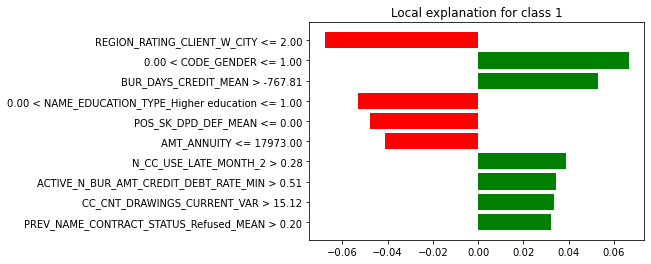

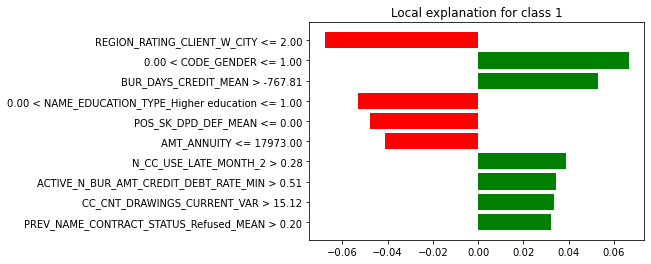

In [55]:
exp_test.as_pyplot_figure()

In [56]:
exp_test.available_labels()

[1]

In [58]:
explanation(100001)

In [59]:
from sklearn.neighbors import NearestNeighbors

In [60]:
nearest_neighbors = NearestNeighbors(n_neighbors=10, radius=0.4)

In [61]:
nearest_neighbors.fit(inputs)

NearestNeighbors(n_neighbors=10, radius=0.4)

In [62]:
ten_neighbors = nearest_neighbors.kneighbors(inputs.loc[[102068]], 11, return_distance=False)

In [63]:
ten_neighbors

array([[  299, 40816, 18265, 38346, 32282, 27920, 42120, 12269, 13689,
         1209, 19883]], dtype=int64)

In [64]:
ten_neighbors[0]

array([  299, 40816, 18265, 38346, 32282, 27920, 42120, 12269, 13689,
        1209, 19883], dtype=int64)

In [65]:
inputs.filter(features_to_show).iloc[ten_neighbors[0]]

REGION_RATING_CLIENT_W_CITY  CODE_GENDER  BUR_DAYS_CREDIT_MEAN  \
SK_ID_CURR                                                                   
102068                              2.0          1.0           -623.142857   
400342                              2.0          1.0          -1061.000000   
232699                              2.0          0.0           -634.000000   
381480                              2.0          1.0           -797.333333   
335017                              2.0          0.0           -746.750000   
303790                              2.0          0.0           -571.714286   
408035                              2.0          0.0          -1333.625000   
189201                              1.0          0.0           -671.800000   
199092                              2.0          1.0           -989.000000   
108548                              2.0          0.0           -470.571429   
244403                              2.0          0.0           -584.636364   

            NAME_EDUCATION_TYPE_Higher education  POS_SK_DPD_DEF_MEAN  \
SK_ID_CURR                                                              
102068                                       1.0                  0.0   
400342                                       0.0                  0.0   
232699                                       0.0                  0.0   
381480                                       0.0                  0.0   
335017                                       0.0                  0.0   
303790                                       0.0                  0.0   
408035                                       0.0                  0.0   
189201                                       0.0                  0.0   
199092                                       0.0                  0.0   
108548                                       0.0                  0.0   
244403                                       0.0                  0.0   

            AMT_ANNUITY  N_CC_USE_LATE_MONTH_2  \
SK_ID_CURR                                       
102068          13198.5               1.038250   
400342          11488.5               0.000000   
232699          18634.5               0.000000   
381480           5746.5               0.278956   
335017          31905.0               0.278956   
303790          30667.5               0.000000   
408035          17253.0               0.000000   
189201          18873.0               0.278956   
199092           8509.5               0.000000   
108548          16461.0               0.000000   
244403          11848.5               0.828755   

            ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN  \
SK_ID_CURR                                          
102068                                   0.659452   
400342                                   0.941425   
232699                                   0.625764   
381480                                   0.689432   
335017                                   0.606608   
303790                                   0.342812   
408035                                   0.359996   
189201                                   0.000000   
199092                                   0.246367   
108548                                   0.790563   
244403                                   0.289188   

            CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                
102068                        18.028947   
400342                         0.000000   
232699                        15.123933   
381480                        15.123933   
335017                        15.123933   
303790                         0.000000   
408035                         3.963025   
189201                        15.123933   
199092                         0.075650   
108548                         0.000000   
244403                         6.980952   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  
SK_ID_CURR                                          
102068                                  

# SHAP

In [66]:
explainerModel = shap.TreeExplainer(model)

In [67]:
explainerModel

In [68]:
shap_values_Model = explainerModel.shap_values(inputs.values)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [69]:
shap.initjs()

In [70]:
j = 299
print('credit_index =', j)
fig = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1][j], inputs.iloc[[j]])

credit_index = 299


In [71]:
fig

In [72]:
shap_values = shap_values_Model

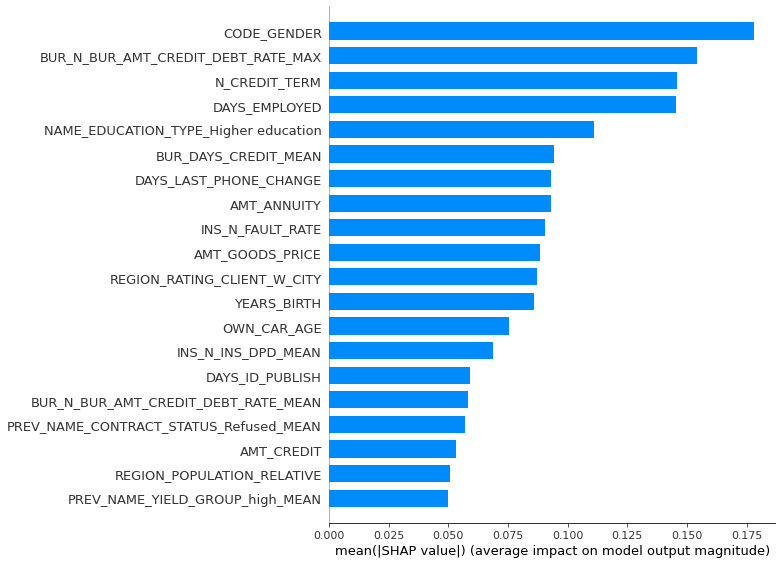

In [73]:
shap.summary_plot(shap_values[0], inputs, plot_type='bar')

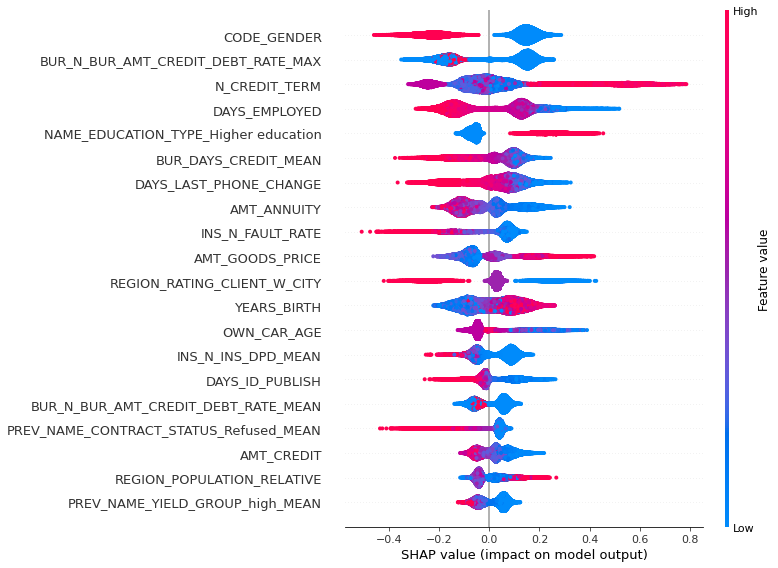

In [74]:
shap.summary_plot(shap_values[0], inputs, show=False)

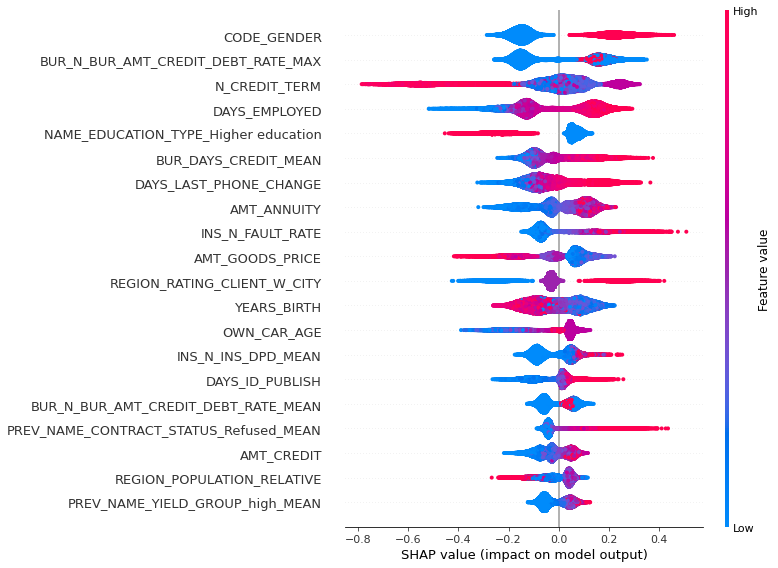

In [75]:
shap.summary_plot(shap_values[1], inputs, show=False)